In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from src.visualization import (histogram, boxplot, scatterplot, hist_per_district, scatter_per_district,
                               ordered_barchart)
from scipy import stats
%load_ext autoreload
%autoreload 2
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format
#sns.set_context('poster')

path_processed = '/home/matteo@COPPET/Documents/data_science/projects/housing_prices_firenze/data/processed/'

In [2]:
df = pd.read_csv(path_processed+'data_clean.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8620 entries, 0 to 8619
Data columns (total 57 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Tipologia                                  8620 non-null   object 
 1   Tipo_proprietà                             8189 non-null   object 
 2   Zona                                       8620 non-null   object 
 3   Anno_costruzione                           6281 non-null   float64
 4   Stato                                      8392 non-null   object 
 5   Prezzo_EUR                                 8620 non-null   float64
 6   Superficie_m2                              8620 non-null   float64
 7   Prezzo_per_m2                              8620 non-null   float64
 8   Riscaldamento_A_C                          8620 non-null   object 
 9   Tipo_riscaldamento                         6697 non-null   object 
 10  Alimentazione_riscaldame

### 1. Continous variables

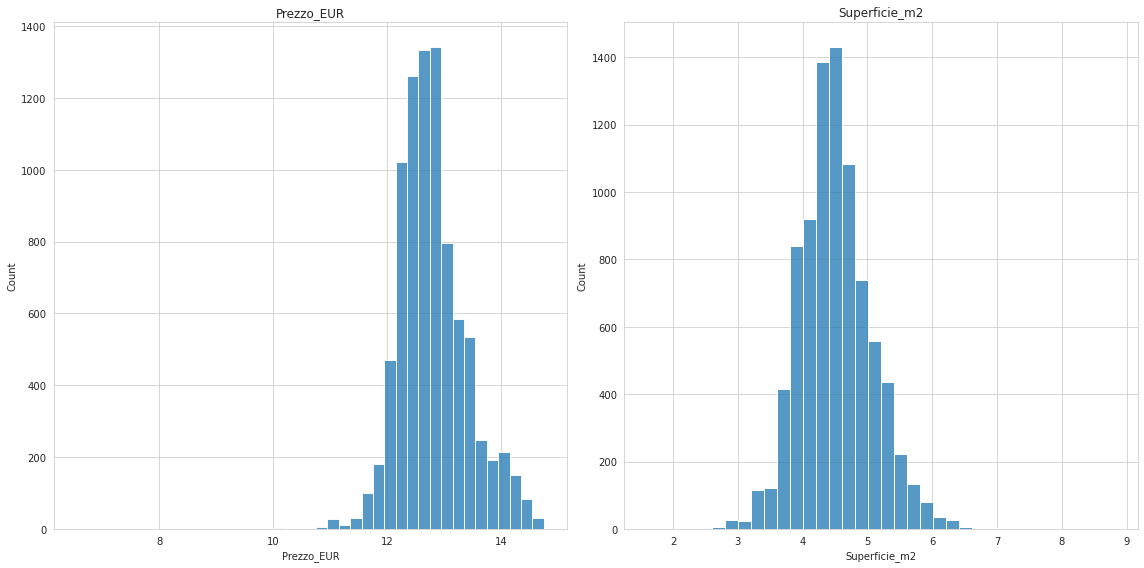

In [3]:
continuous_vars = ['Prezzo_EUR', 'Superficie_m2']
histograms = histogram(df, continuous_vars, transformation=np.log)
plt.show()

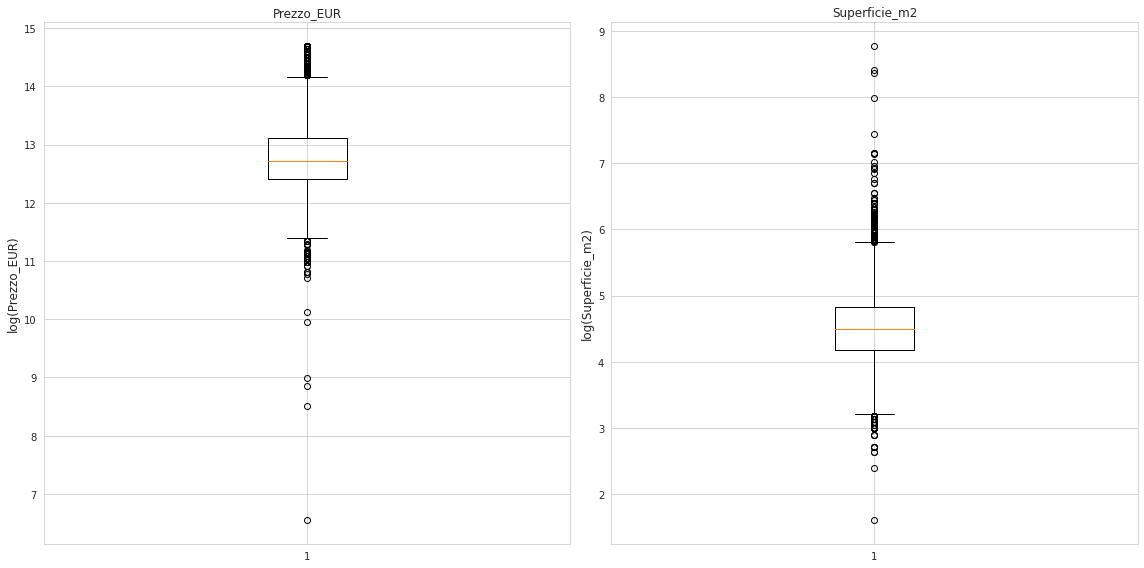

In [4]:
boxplots = boxplot(df, continuous_vars, transformation=np.log)
plt.show()

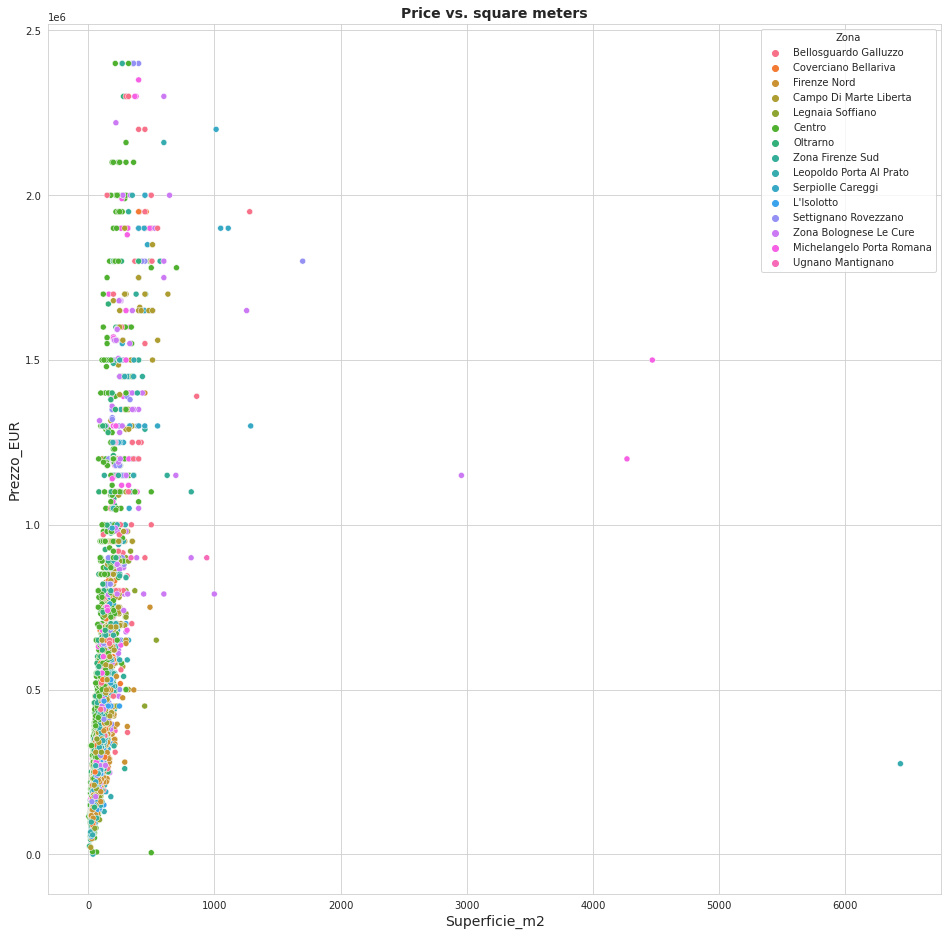

In [5]:
scatter = scatterplot(df, 'Superficie_m2', 'Prezzo_EUR', hue_data=df['Zona'], transformation=None)
plt.show()

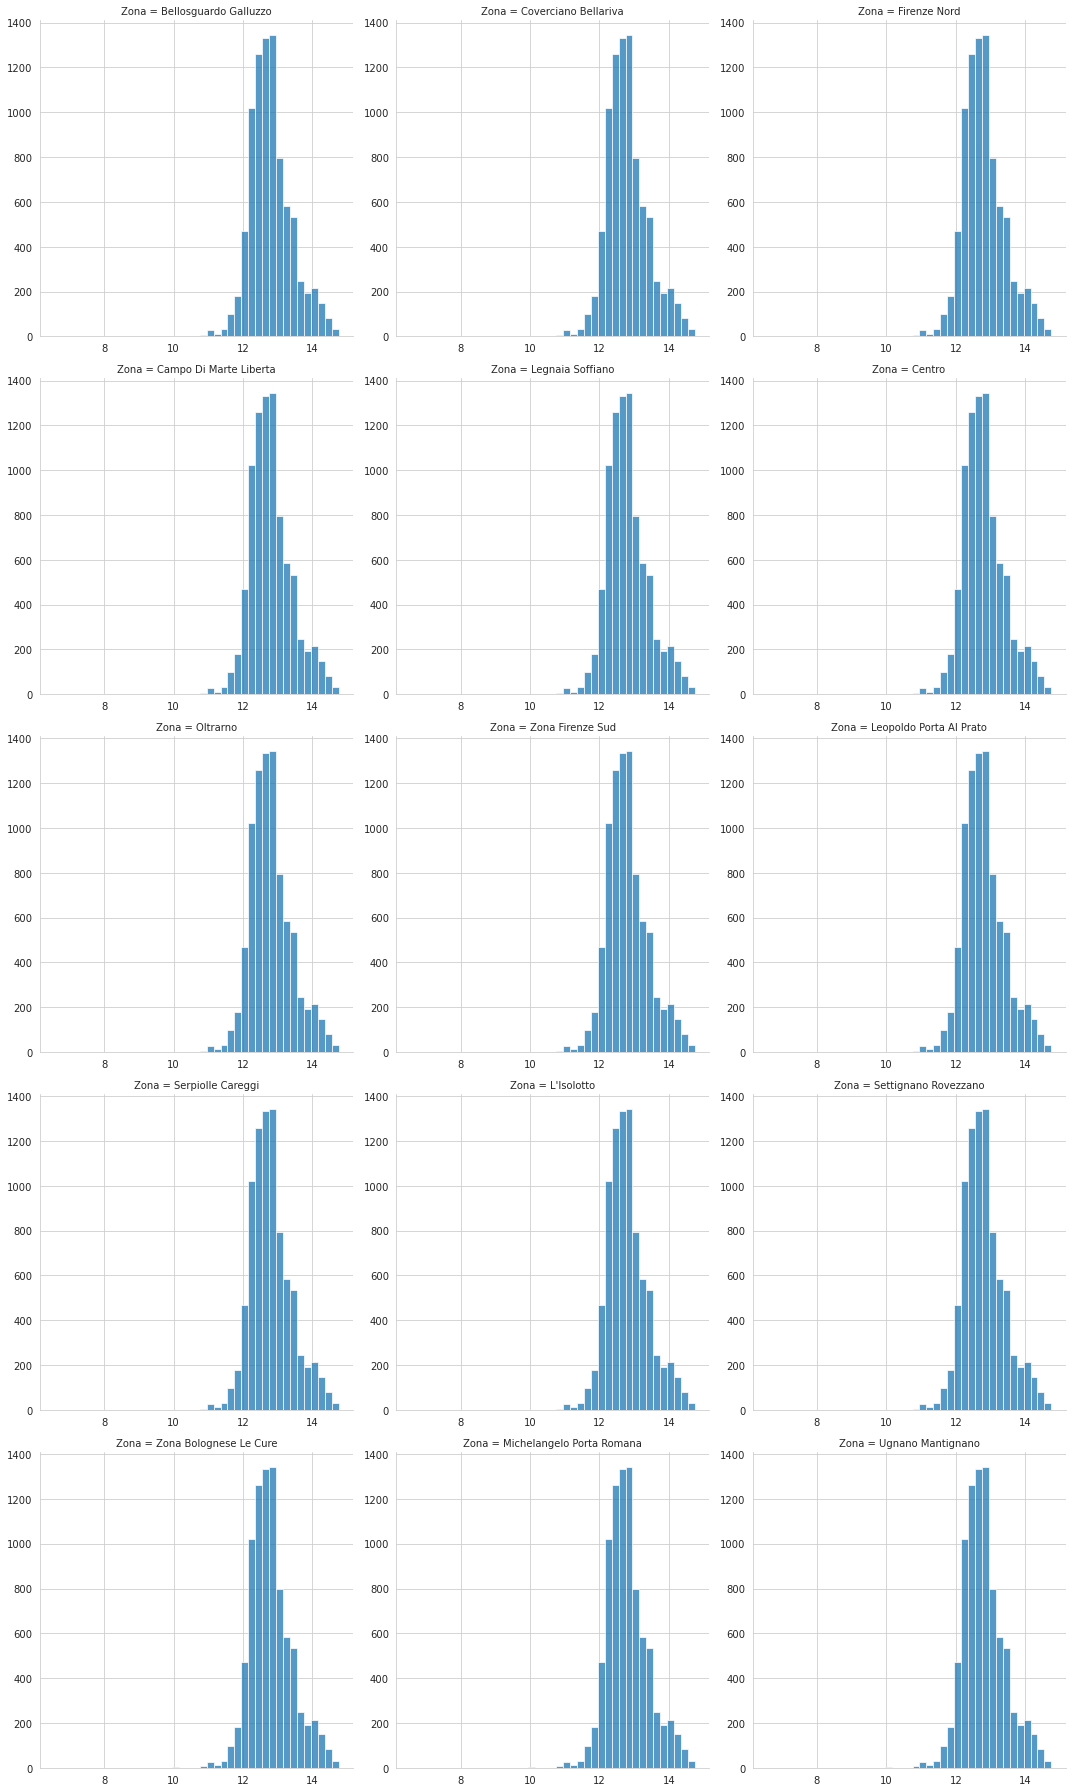

In [6]:
hists = hist_per_district(df, 'Zona', None, 'Prezzo_EUR', transformation=np.log)
plt.show()

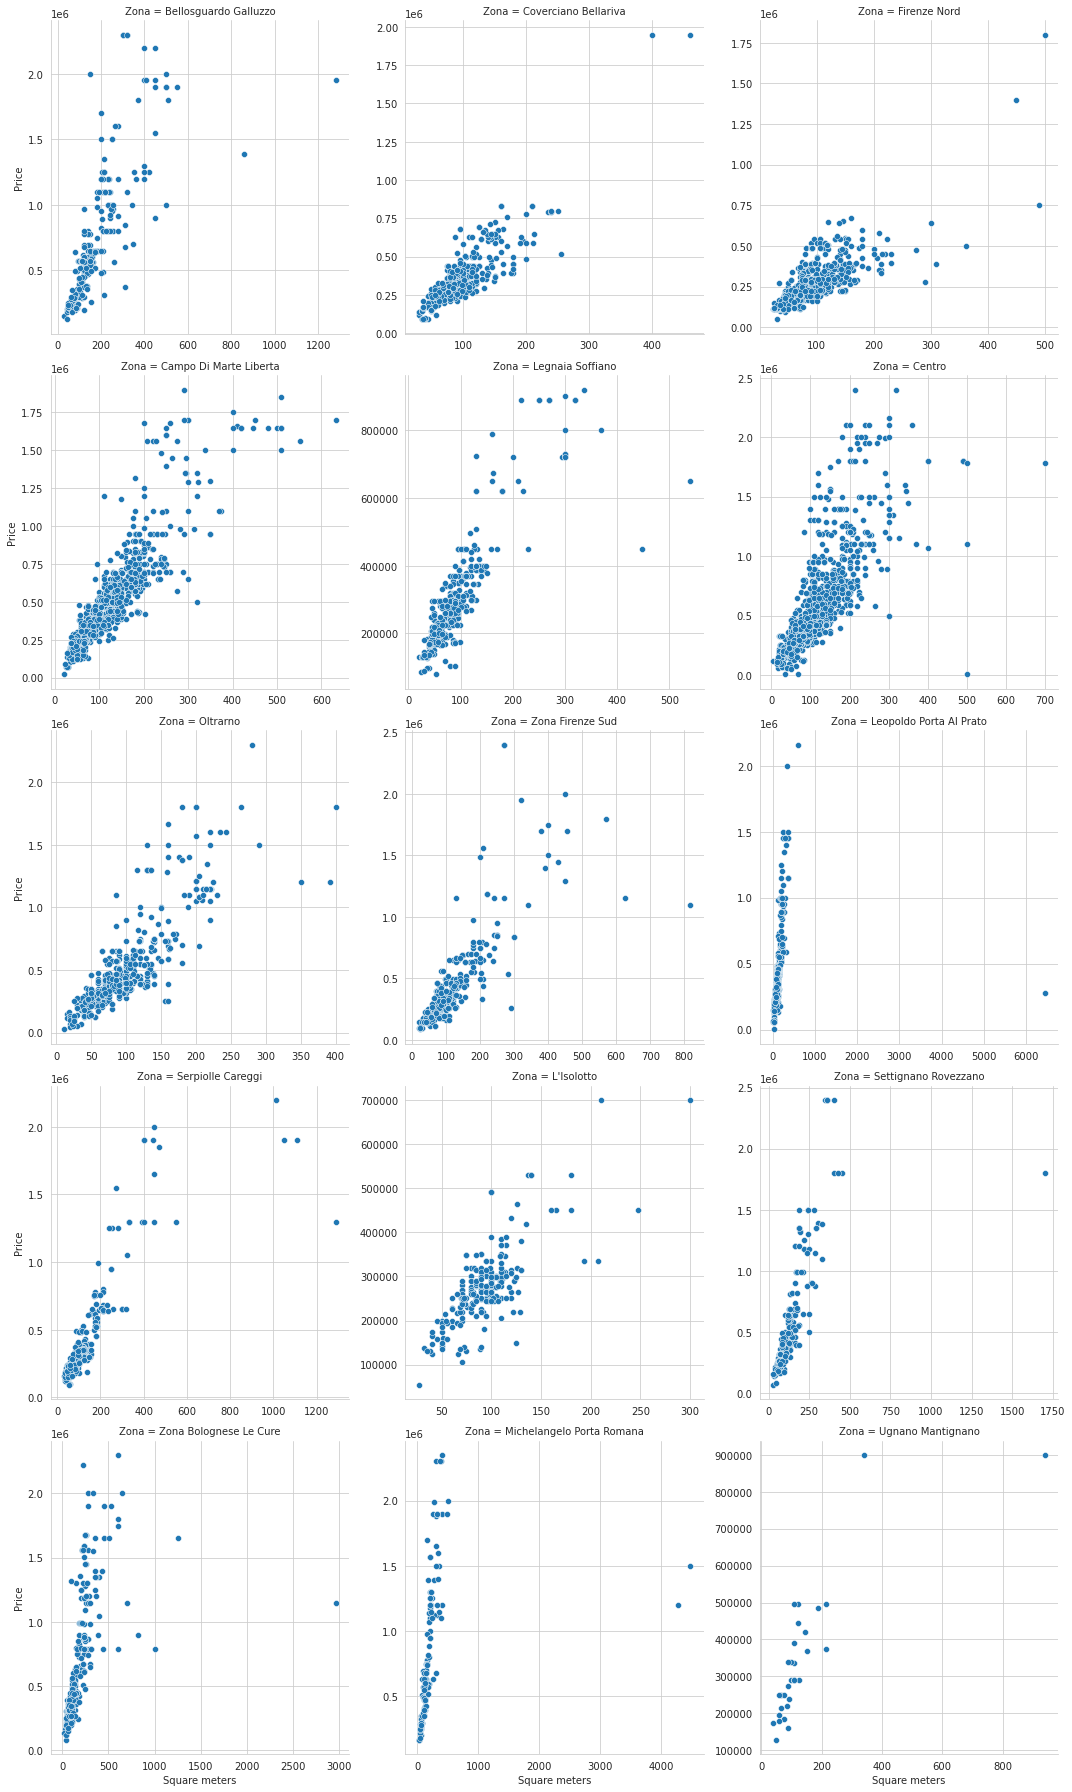

In [7]:
scatters = scatter_per_district(df, col='Zona', row=None, transformation=None)
plt.show()

### 2. Categorical variables

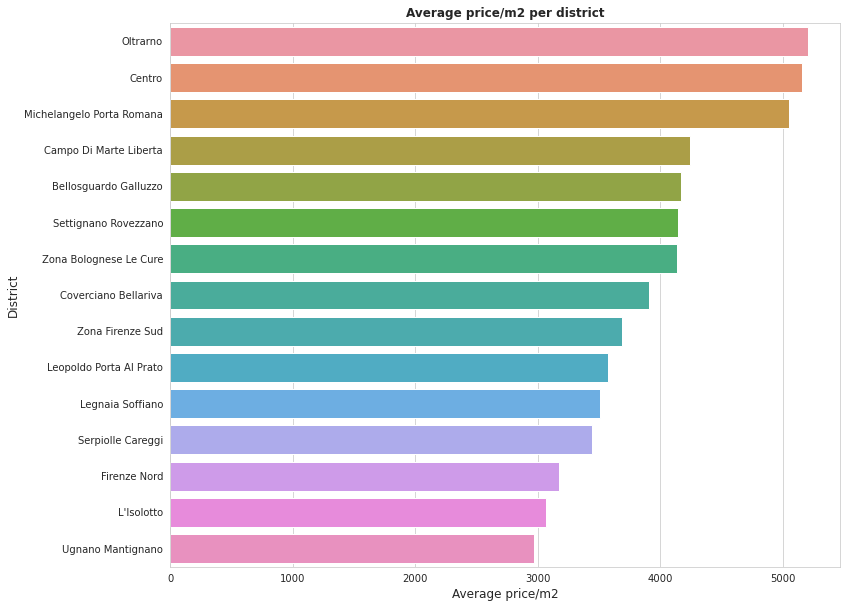

In [8]:
barchart = ordered_barchart(df)
plt.show()